In [292]:
# Importing dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import json

import warnings
warnings.filterwarnings('ignore')

In [293]:
# Reading the data source
df = pd.read_csv('../resources/game_data.csv')

X = df['tags']

# Previewing the whole dataframe
df.head()

,name,appid,developer,publisher,positive,negative,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu,genre,tags
0,PLAYERUNKNOWN'S BATTLEGROUNDS,578080,"KRAFTON, Inc.","KRAFTON, Inc.",893428,762728,"50,000,000 .. 100,000,000",24435,737,11212,264,2999,2999,0,282516,"Action, Adventure, Massively Multiplayer","{'Survival': 13071, 'Shooter': 10886, 'Multipl..."
1,Unturned,304930,Smartly Dressed Games,Smartly Dressed Games,382134,36873,"20,000,000 .. 50,000,000",6768,2094,345,833,0,0,0,25275,"Action, Adventure, Casual, Free to Play, Indie","{'Free to Play': 35851, 'Survival': 15583, 'Zo..."
2,Garry's Mod,4000,Facepunch Studios,Valve,640039,23144,"20,000,000 .. 50,000,000",11978,558,1545,111,999,999,0,37082,"Indie, Simulation","{'Sandbox': 16826, 'Multiplayer': 13088, 'Funn..."
3,Counter-Strike: Global Offensive,730,"Valve, Hidden Path Entertainment",Valve,4654419,628163,"50,000,000 .. 100,000,000",26400,992,7108,384,0,0,0,1026077,"Action, Free to Play","{'FPS': 85839, 'Shooter': 61452, 'Multiplayer'..."
4,Among Us,945360,Innersloth,Innersloth,471670,23207,"20,000,000 .. 50,000,000",1255,429,602,57,499,499,0,27967,Casual,"{'Multiplayer': 1132, 'Online Co-Op': 797, 'Sp..."


In [294]:
# Checking the first element
X[0]

"{'Survival': 13071, 'Shooter': 10886, 'Multiplayer': 9467, 'Battle Royale': 8881, 'FPS': 7139, 'PvP': 6880, 'Third-Person Shooter': 6345, 'Action': 5293, 'Online Co-Op': 4706, 'Tactical': 4423, 'Co-op': 3750, 'First-Person': 3496, 'Strategy': 2714, 'Early Access': 2610, 'Competitive': 1893, 'Third Person': 1839, 'Team-Based': 1651, 'Difficult': 1387, 'Simulation': 1060, 'Stealth': 953}"

In [295]:
# Checking the number of elements
len(X)

596

In [296]:
# Creating a list of tags which are games that contain user tag information and a list of missing data
tags = []
missed = []

for i in range(0, len(X)):
    try:
        a = json.loads(X[i].replace("'", "\""))
        tags.append(a)
    except:
        # tags.append('N/A')
        missed.append(i)

# Checking how many games remain and how many are missed
print(f'{len(tags)}, {len(missed)}')

562, 34


In [297]:
# Test conversion from dictionary to df
tag_df = pd.DataFrame.from_dict(tags[0], orient='index').T
tag_df

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,Co-op,First-Person,Strategy,Early Access,Competitive,Third Person,Team-Based,Difficult,Simulation,Stealth
0,13071,10886,9467,8881,7139,6880,6345,5293,4706,4423,3750,3496,2714,2610,1893,1839,1651,1387,1060,953


In [298]:
# Finding the unique tags that exist to understand how many features exist
unique = []
all_tags = []

for count, x in enumerate(tags):
    for y in x:
        all_tags.append(y)
        if y not in unique:
            unique.append(y)
            
len(unique), len(all_tags)

(360, 10801)

In [ ]:
from collections import Counter

# Counting how frequently tags appear
Counter(all_tags)

In [300]:
# Defining a function to check if there are any non-dict elements in a list
def checkType(a_list):
    types = [0, 0, 0]
    for element in a_list:
        if isinstance(element, dict):
            types[0] += 1
        else:
            types[1] += 1
            types[2] = a_list.index(element)
    return types

z = checkType(tags)

# Appending missing elements to the list
missed.append(z[2])

# Checking the results of the function
print(z, len(missed))

[561, 1, 384] 35


In [301]:
# Examining the items in the tags list
for i in range(0, 3):
    print(f'{type(tags[i])}, {i}\n {tags[i]}\n')

<class 'dict'>, 0
 {'Survival': 13071, 'Shooter': 10886, 'Multiplayer': 9467, 'Battle Royale': 8881, 'FPS': 7139, 'PvP': 6880, 'Third-Person Shooter': 6345, 'Action': 5293, 'Online Co-Op': 4706, 'Tactical': 4423, 'Co-op': 3750, 'First-Person': 3496, 'Strategy': 2714, 'Early Access': 2610, 'Competitive': 1893, 'Third Person': 1839, 'Team-Based': 1651, 'Difficult': 1387, 'Simulation': 1060, 'Stealth': 953}

<class 'dict'>, 1
 {'Free to Play': 35851, 'Survival': 15583, 'Zombies': 14615, 'Open World Survival Craft': 14299, 'Multiplayer': 13729, 'Open World': 12276, 'Adventure': 9272, 'Crafting': 8911, 'Action': 7850, 'First-Person': 7568, 'Co-op': 7247, 'Sandbox': 6713, 'Shooter': 6475, 'Post-apocalyptic': 6349, 'FPS': 5707, 'Singleplayer': 5362, 'Massively Multiplayer': 4319, 'Indie': 4105, 'Casual': 3673, 'Atmospheric': 3623}

<class 'dict'>, 2
 {'Sandbox': 16826, 'Multiplayer': 13088, 'Funny': 11686, 'Moddable': 9245, 'Building': 9069, 'Comedy': 7880, 'Co-op': 7793, 'Mod': 7594, 'First-

In [302]:
# Removing the non-dict elements
del tags[z[2]]

In [705]:
# Creating a dataframe from the dictionaries
d = pd.DataFrame(tags)
d

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Software Training,Asymmetric VR,Grid-Based Movement,Mars,Traditional Roguelike,Text-Based,Voice Control,Trivia,Transportation,Trains
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15583.0,6475.0,13729.0,NaN,5707.0,NaN,NaN,7850.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5042.0,13088.0,NaN,5814.0,NaN,NaN,5256.0,6142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,61452.0,58764.0,NaN,85839.0,32501.0,NaN,45016.0,32204.0,39195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,658.0,NaN,1132.0,NaN,NaN,311.0,NaN,NaN,797.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,NaN,NaN,NaN,NaN,NaN,NaN,146.0,NaN,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,89.0,NaN,NaN,NaN,NaN,141.0,139.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN,NaN
559,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,43.0


In [706]:
y = df['name']
y

0             PLAYERUNKNOWN'S BATTLEGROUNDS
1                                  Unturned
2                               Garry's Mod
3          Counter-Strike: Global Offensive
4                                  Among Us
                       ...                 
591    Shadow Tactics: Blades of the Shogun
592                             Hammerwatch
593                The Jackbox Party Pack 3
594                      Cities in Motion 2
595                                  TOXIKK
Name: name, Length: 596, dtype: object

In [707]:
# Creating a list of game titles
names = list(y)

# Removing the elements which had missing tag information
for index in sorted(missed, reverse=True):
    del names[index]

# Checking the length matches the df length
len(names)

561

In [708]:
# Adding a new column to the df
d['title'] = names
d

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Asymmetric VR,Grid-Based Movement,Mars,Traditional Roguelike,Text-Based,Voice Control,Trivia,Transportation,Trains,title
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLAYERUNKNOWN'S BATTLEGROUNDS
1,15583.0,6475.0,13729.0,NaN,5707.0,NaN,NaN,7850.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unturned
2,NaN,5042.0,13088.0,NaN,5814.0,NaN,NaN,5256.0,6142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Garry's Mod
3,NaN,61452.0,58764.0,NaN,85839.0,32501.0,NaN,45016.0,32204.0,39195.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Counter-Strike: Global Offensive
4,658.0,NaN,1132.0,NaN,NaN,311.0,NaN,NaN,797.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Among Us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,NaN,NaN,NaN,NaN,NaN,NaN,146.0,NaN,497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shadow Tactics: Blades of the Shogun
557,NaN,NaN,89.0,NaN,NaN,NaN,NaN,141.0,139.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hammerwatch
558,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN,NaN,The Jackbox Party Pack 3
559,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,43.0,Cities in Motion 2


In [709]:
# Replacing NaN values with 0 to indicate 0 votes for that tag
d.fillna(0, inplace=True)
d

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Asymmetric VR,Grid-Based Movement,Mars,Traditional Roguelike,Text-Based,Voice Control,Trivia,Transportation,Trains,title
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PLAYERUNKNOWN'S BATTLEGROUNDS
1,15583.0,6475.0,13729.0,0.0,5707.0,0.0,0.0,7850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unturned
2,0.0,5042.0,13088.0,0.0,5814.0,0.0,0.0,5256.0,6142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Garry's Mod
3,0.0,61452.0,58764.0,0.0,85839.0,32501.0,0.0,45016.0,32204.0,39195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Counter-Strike: Global Offensive
4,658.0,0.0,1132.0,0.0,0.0,311.0,0.0,0.0,797.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Among Us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shadow Tactics: Blades of the Shogun
557,0.0,0.0,89.0,0.0,0.0,0.0,0.0,141.0,139.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hammerwatch
558,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.0,0.0,The Jackbox Party Pack 3
559,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,43.0,Cities in Motion 2


In [710]:
# Finding the summary statistics of the data
info_df = d.describe()
info_df

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Software Training,Asymmetric VR,Grid-Based Movement,Mars,Traditional Roguelike,Text-Based,Voice Control,Trivia,Transportation,Trains
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,363.775401,463.654189,828.871658,28.786096,493.613191,200.474153,103.092692,748.524064,295.595365,190.515152,...,0.037433,0.078431,0.508021,0.121212,1.818182,0.008913,0.028520,0.199643,0.192513,0.076649
std,2142.251469,2864.298255,3302.975987,387.521314,3790.303868,1704.742728,630.380853,2395.295924,1695.251337,1875.513948,...,0.886621,1.857681,12.032709,2.870962,41.326087,0.211100,0.675521,4.728644,4.559764,1.815461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,179.000000,0.000000,0.000000,0.000000,0.000000,262.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,221.000000,528.000000,0.000000,186.000000,0.000000,0.000000,660.000000,38.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40243.000000,61452.000000,58764.000000,8881.000000,85839.000000,32501.000000,10719.000000,45016.000000,32204.000000,39195.000000,...,21.000000,44.000000,285.000000,68.000000,978.000000,5.000000,16.000000,112.000000,108.000000,43.000000


In [711]:
# Removing the features which received no more than 7500 votes for any particular game
to_drop = [c for c in info_df.columns if info_df[c]['max'] < 7500]

print(f'Columns to be removed: {len(to_drop)}\nColumns remaining: {len(info_df.columns) - len(to_drop)}')

Columns to be removed: 295
Columns remaining: 65


In [541]:
# to_drop = [c for c in info_df.columns if info_df[c]['mean'] < 100]

# print(f'Columns to be removed: {len(to_drop)}\nColumns remaining: {len(info_df.columns) - len(to_drop)}')

Columns to be removed: 319
Columns remaining: 41


In [712]:
# Removing the unwanted features
d.drop(to_drop, axis=1, inplace=True)
d

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Story Rich,Choices Matter,Horror,Survival Horror,Pixel Graphics,Point & Click,Naval Combat,Naval,Souls-like,title
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PLAYERUNKNOWN'S BATTLEGROUNDS
1,15583.0,6475.0,13729.0,0.0,5707.0,0.0,0.0,7850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unturned
2,0.0,5042.0,13088.0,0.0,5814.0,0.0,0.0,5256.0,6142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Garry's Mod
3,0.0,61452.0,58764.0,0.0,85839.0,32501.0,0.0,45016.0,32204.0,39195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Counter-Strike: Global Offensive
4,658.0,0.0,1132.0,0.0,0.0,311.0,0.0,0.0,797.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Among Us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shadow Tactics: Blades of the Shogun
557,0.0,0.0,89.0,0.0,0.0,0.0,0.0,141.0,139.0,0.0,...,0.0,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,Hammerwatch
558,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Jackbox Party Pack 3
559,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cities in Motion 2


In [713]:
# Checking the remaining columns
for c in d.columns:
    print(c)

Survival
Shooter
Multiplayer
Battle Royale
FPS
PvP
Third-Person Shooter
Action
Online Co-Op
Tactical
Co-op
First-Person
Strategy
Competitive
Third Person
Team-Based
Difficult
Simulation
Stealth
Free to Play
Zombies
Open World Survival Craft
Open World
Adventure
Crafting
Sandbox
Post-apocalyptic
Singleplayer
Massively Multiplayer
Atmospheric
Funny
Moddable
Building
Comedy
Mod
e-sports
Military
War
Trading
Realistic
Fast-Paced
2D
World War II
Historical
PvE
Looter Shooter
Loot
Hero Shooter
Class-Based
Automobile Sim
Crime
Mature
Racing
Great Soundtrack
MOBA
RPG
Story Rich
Choices Matter
Horror
Survival Horror
Pixel Graphics
Point & Click
Naval Combat
Naval
Souls-like
title


In [714]:
# Creating a test df containing only numeric features
test_df = d.drop('title', axis=1)
test_df

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,RPG,Story Rich,Choices Matter,Horror,Survival Horror,Pixel Graphics,Point & Click,Naval Combat,Naval,Souls-like
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15583.0,6475.0,13729.0,0.0,5707.0,0.0,0.0,7850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5042.0,13088.0,0.0,5814.0,0.0,0.0,5256.0,6142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,61452.0,58764.0,0.0,85839.0,32501.0,0.0,45016.0,32204.0,39195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,658.0,0.0,1132.0,0.0,0.0,311.0,0.0,0.0,797.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,89.0,0.0,0.0,0.0,0.0,141.0,139.0,0.0,...,203.0,0.0,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0
558,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [789]:
test_df.iloc[:, :-1].sum(axis=1)

0       95834.0
1      185749.0
2      133789.0
3      742284.0
4        4624.0
         ...   
556      2476.0
557      1182.0
558       326.0
559       681.0
560      1363.0
Length: 561, dtype: float64

In [715]:
# Adding a sum of each row column
test_df['sum'] = test_df.iloc[:, :-1].sum(axis=1)
test_df

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Story Rich,Choices Matter,Horror,Survival Horror,Pixel Graphics,Point & Click,Naval Combat,Naval,Souls-like,sum
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95834.0
1,15583.0,6475.0,13729.0,0.0,5707.0,0.0,0.0,7850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185749.0
2,0.0,5042.0,13088.0,0.0,5814.0,0.0,0.0,5256.0,6142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133789.0
3,0.0,61452.0,58764.0,0.0,85839.0,32501.0,0.0,45016.0,32204.0,39195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,742284.0
4,658.0,0.0,1132.0,0.0,0.0,311.0,0.0,0.0,797.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2476.0
557,0.0,0.0,89.0,0.0,0.0,0.0,0.0,141.0,139.0,0.0,...,0.0,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,1182.0
558,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326.0
559,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.0


In [716]:
# Finding any games with no values remaining (due to feature selection)
to_drop = []

for index, row in test_df.loc[test_df['sum'] == 0].iterrows():
    to_drop.append(index)
    
d.drop(d.index[to_drop], inplace=True)
len(d)

560

In [547]:
# # Removing the game from the dataset
# d.drop(452, inplace=True)
# len(d)

In [717]:
# Previewing the df
d

,Survival,Shooter,Multiplayer,Battle Royale,FPS,PvP,Third-Person Shooter,Action,Online Co-Op,Tactical,...,Story Rich,Choices Matter,Horror,Survival Horror,Pixel Graphics,Point & Click,Naval Combat,Naval,Souls-like,title
0,13071.0,10886.0,9467.0,8881.0,7139.0,6880.0,6345.0,5293.0,4706.0,4423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PLAYERUNKNOWN'S BATTLEGROUNDS
1,15583.0,6475.0,13729.0,0.0,5707.0,0.0,0.0,7850.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unturned
2,0.0,5042.0,13088.0,0.0,5814.0,0.0,0.0,5256.0,6142.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Garry's Mod
3,0.0,61452.0,58764.0,0.0,85839.0,32501.0,0.0,45016.0,32204.0,39195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Counter-Strike: Global Offensive
4,658.0,0.0,1132.0,0.0,0.0,311.0,0.0,0.0,797.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Among Us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,48.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shadow Tactics: Blades of the Shogun
557,0.0,0.0,89.0,0.0,0.0,0.0,0.0,141.0,139.0,0.0,...,0.0,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,Hammerwatch
558,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Jackbox Party Pack 3
559,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cities in Motion 2


In [718]:
# Defining the X and y variables for the model
X = d.drop('title', axis=1)
y = d[['title']]

# Checking the shape
print(X.shape, y.shape)

(560, 65) (560, 1)


In [631]:
# Instantiating a scaler and scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(560, 65)

In [632]:
# Previewing the scaled data
X_scaled

array([[ 5.93156449,  3.63850451,  2.61495535, ..., -0.04301185,
        -0.04444674, -0.10505933],
       [ 7.10419283,  2.09847516,  3.90537954, ..., -0.04301185,
        -0.04444674, -0.10505933],
       [-0.17011747,  1.59816637,  3.71130119, ..., -0.04301185,
        -0.04444674, -0.10505933],
       ...,
       [-0.17011747, -0.16216643, -0.22567339, ..., -0.04301185,
        -0.04444674, -0.10505933],
       [-0.17011747, -0.16216643, -0.23808713, ..., -0.04301185,
        -0.04444674, -0.10505933],
       [-0.17011747, -0.10735242, -0.20114866, ..., -0.04301185,
        -0.04444674, -0.10505933]])

In [633]:
# Finding the best number of clusters for KMeans
score_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    score_1.append(kmeans.inertia_)

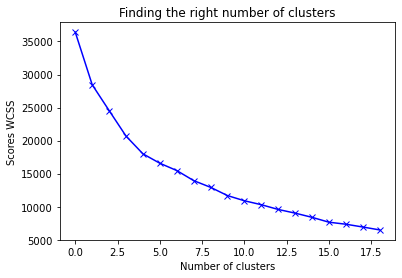

In [634]:
# Plotting the best number of clusters
plt.plot(score_1, "bx-")
plt.title("Finding the right number of clusters")
plt.ylabel("Scores WCSS")
plt.xlabel("Number of clusters")
plt.show()

In [635]:
# Recreating the model with the best number of clusters
kmeans = KMeans(7)
kmeans.fit(X_scaled)
labels = kmeans.labels_
Counter(labels)

Counter({0: 20, 3: 1, 1: 1, 6: 535, 4: 1, 5: 1, 2: 1})

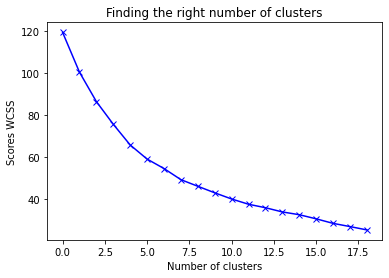

In [636]:
# Trying the same KMeans methodology but with the MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

score_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    score_1.append(kmeans.inertia_)
    
plt.plot(score_1, "bx-")
plt.title("Finding the right number of clusters")
plt.ylabel("Scores WCSS")
plt.xlabel("Number of clusters")
plt.show()

In [637]:
# Trying the KMeans model again
kmeans = KMeans(7)
kmeans.fit(X_scaled)
labels = kmeans.labels_
Counter(labels)

Counter({0: 540, 3: 4, 6: 1, 1: 1, 2: 1, 4: 12, 5: 1})

In [638]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(X_scaled)
principal_comp

array([[ 0.30419838,  0.15891296],
       [ 0.96336056, -0.62394291],
       [ 1.34408523, -0.65358905],
       ...,
       [-0.07807663,  0.03603743],
       [-0.0744536 ,  0.03710898],
       [-0.07547617,  0.03822171]])

In [639]:
pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,0.304198,0.158913
1,0.963361,-0.623943
2,1.344085,-0.653589
3,3.064579,2.786648
4,-0.053756,0.034179


In [640]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.304198,0.158913,0
1,0.963361,-0.623943,3
2,1.344085,-0.653589,6
3,3.064579,2.786648,1
4,-0.053756,0.034179,0


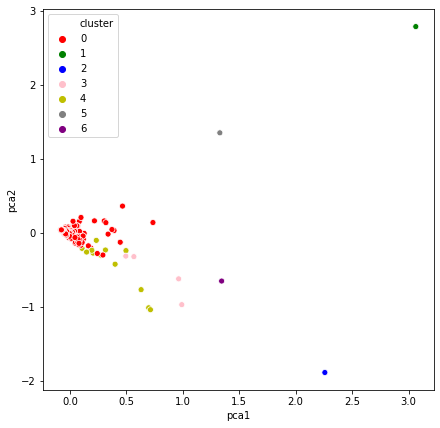

In [641]:
import seaborn as sns

plt.figure(figsize = (7, 7))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ["r", "g", "b", "pink", "y", "grey", "purple"])

In [642]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

In [646]:
input_df = Input(shape = (65,))

x = Dense(7, activation = "relu")(input_df)
x = Dense(100, activation = "relu", kernel_initializer = "glorot_uniform")(x)
x = Dense(100, activation = "relu", kernel_initializer = "glorot_uniform")(x)
x = Dense(100, activation = "relu", kernel_initializer = "glorot_uniform")(x)

encoded = Dense(10, activation = "relu", kernel_initializer = "glorot_uniform")(x)

x = Dense(100, activation = "relu", kernel_initializer = "glorot_uniform")(encoded)
x = Dense(100, activation = "relu", kernel_initializer = "glorot_uniform")(x)

decoded = Dense(65, kernel_initializer = "glorot_uniform")(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = "adam", loss = "mean_squared_error")

In [647]:
X_scaled.shape

(560, 65)

In [648]:
autoencoder.fit(X_scaled, X_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
5/5 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 2/25
5/5 [==============================] - 0s 997us/step - loss: 0.0032
Epoch 3/25
5/5 [==============================] - 0s 997us/step - loss: 0.0025
Epoch 4/25
5/5 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 5/25
5/5 [==============================] - 0s 997us/step - loss: 0.0033
Epoch 6/25
5/5 [==============================] - 0s 748us/step - loss: 0.0036
Epoch 7/25
5/5 [==============================] - 0s 997us/step - loss: 0.0030
Epoch 8/25
5/5 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 9/25
5/5 [==============================] - 0s 998us/step - loss: 0.0028
Epoch 10/25
5/5 [==============================] - 0s 997us/step - loss: 0.0026
Epoch 11/25
5/5 [==============================] - 0s 997us/step - loss: 0.0025
Epoch 12/25
5/5 [==============================] - 0s 748us/step - loss: 0.0027
Epoch 13/25
5/5 [==============================] - 0s

In [649]:
autoencoder.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 65)]              0         
_________________________________________________________________
dense_40 (Dense)             (None, 7)                 462       
_________________________________________________________________
dense_41 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_45 (Dense)             (None, 100)               110

In [650]:
pred = encoder.predict(X_scaled)
pred.shape

(560, 10)

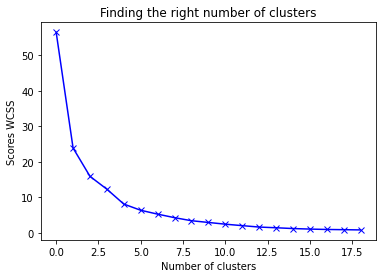

In [651]:
score_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    score_1.append(kmeans.inertia_)
    
plt.plot(score_1, "bx-")
plt.title("Finding the right number of clusters")
plt.ylabel("Scores WCSS")
plt.xlabel("Number of clusters")
plt.show()

In [652]:
kmeans = KMeans(7)
kmeans.fit(pred)
labels = kmeans.labels_

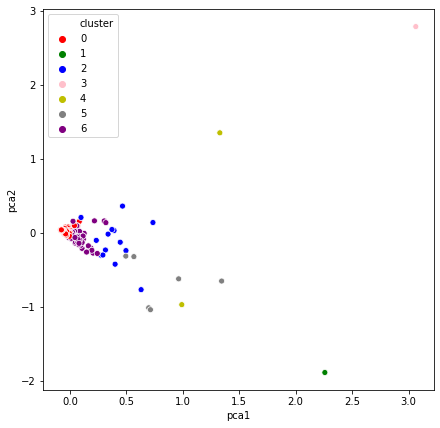

In [653]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(X_scaled)
principal_comp

pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])

pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)

plt.figure(figsize = (7, 7))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ["r", "g", "b", "pink", "y", "grey", "purple"])

In [654]:
pca_df.groupby('cluster').count()

,pca1,pca2
cluster,,
0,458,458
1,1,1
2,14,14
3,1,1
4,2,2
5,6,6
6,78,78


(<matplotlib.axes._subplots.AxesSubplot at 0x15bc7685730>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15bc7685730>)

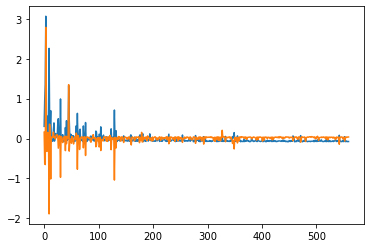

In [655]:
pca_df['pca1'].plot(), pca_df['pca2'].plot()

In [719]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(X_scaled)
principal_comp

pca_df = pd.DataFrame(data = principal_comp, columns = ["pca1", "pca2"])

In [720]:
pca_df

,pca1,pca2
0,6.550105,1.974666
1,7.399784,12.790870
2,11.030052,17.078346
3,84.415905,-16.353059
4,-0.501004,-0.638064
...,...,...
555,-0.666911,-0.809900
556,-0.776162,-0.787420
557,-0.828787,-0.875684
558,-0.800526,-0.872067


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_scaled = scaler.fit_transform(pca_df)
X_scaled.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [721]:
pca_df['title'] = y
pca_df

,pca1,pca2,title
0,6.550105,1.974666,PLAYERUNKNOWN'S BATTLEGROUNDS
1,7.399784,12.790870,Unturned
2,11.030052,17.078346,Garry's Mod
3,84.415905,-16.353059,Counter-Strike: Global Offensive
4,-0.501004,-0.638064,Among Us
...,...,...,...
555,-0.666911,-0.809900,Magic Lantern
556,-0.776162,-0.787420,Shadow Tactics: Blades of the Shogun
557,-0.828787,-0.875684,Hammerwatch
558,-0.800526,-0.872067,The Jackbox Party Pack 3


In [722]:
X = pca_df.iloc[0, :2]
X

pca1    6.55011
pca2    1.97467
Name: 0, dtype: object

In [723]:
X[0]

6.550105270518048

In [724]:
def distance(x1, x2):
    d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))
    return d

In [725]:
z = distance(X, pca_df.iloc[1, :2])

In [726]:
z

10.782778645723363

In [729]:
minimum = 1000
tracker = 1

for i in range(0, 560):
    x2 = pca_df.iloc[i, :2]
    a = distance(X, x2)
    if a > 0 and a < minimum:
        minimum = a
        tracker = i

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


In [740]:
y['title'][tracker]

'Warframe'

In [743]:
X = pca_df.iloc[4, :2]
X

pca1   -0.501004
pca2   -0.638064
Name: 4, dtype: object

In [744]:
minimum = 1000
tracker = 1

for i in range(0, 560):
    x2 = pca_df.iloc[i, :2]
    a = distance(X, x2)
    if a > 0 and a < minimum:
        minimum = a
        tracker = i

y['title'][tracker]

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


'People Playground'

In [749]:
inputs = [pca_df.iloc[0, :2], pca_df.iloc[1, :2], pca_df.iloc[2, :2]]
inputs

[pca1    6.55011
 pca2    1.97467
 Name: 0, dtype: object,
 pca1    7.39978
 pca2    12.7909
 Name: 1, dtype: object,
 pca1    11.0301
 pca2    17.0783
 Name: 2, dtype: object]

In [752]:
inputs[0][1]

1.9746657706463042

In [753]:
def averagePoint(arr):
    x = 0
    y = 0
    count = 0
    for i in arr:
        x += i[0]
        y += i[1]
        count += 1
    
    x = x / count
    y = y / count
    
    return [x, y]

In [755]:
averagePoint(inputs)

[8.326647252007215, 10.61462707787014]

In [756]:
minimum = 1000
tracker = 1

X = averagePoint(inputs)

for i in range(0, 560):
    x2 = pca_df.iloc[i, :2]
    a = distance(X, x2)
    if a > 0 and a < minimum:
        minimum = a
        tracker = i

y['title'][tracker]

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


'Everlasting Summer'

In [783]:
class steamPredictor:
    def __init__(self):
        self = self
    
    def averagePoint(self, arr):
        x = 0
        y = 0
        count = 0
        for i in arr:
            x += i[0]
            y += i[1]
            count += 1

        x = x / count
        y = y / count

        return [x, y]
    
    def prediction(self, inputs):
        inputs = inputs
        
        minimum = 1000
        tracker = 1

        X = averagePoint(inputs)
        
        for i in range(0, 560):
            x2 = pca_df.iloc[i, :2]
            a = distance(X, x2)
            if a > 0 and a < minimum:
                minimum = a
                tracker = i
                
        return y['title'][tracker]

In [784]:
steamPredictor().prediction(inputs)

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


'Everlasting Summer'

In [785]:
inputs = [pca_df.iloc[5, :2], pca_df.iloc[10, :2], pca_df.iloc[22, :2]]
inputs

[pca1    4.49905
 pca2    6.72597
 Name: 5, dtype: object,
 pca1    9.86195
 pca2   -2.13147
 Name: 10, dtype: object,
 pca1     1.5607
 pca2   -0.75809
 Name: 22, dtype: object]

In [786]:
steamPredictor().prediction(inputs)

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


'Arma 3'

In [790]:
inputs = [[5, 5], [2, 2], [7, 7]]
steamPredictor().prediction(inputs)

<ipython-input-724-018e08a336f1>:4: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(pow((x2[1] - x1[1]), 2) - pow((x2[0] - x1[0]), 2))


'VRChat'